In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [2]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fight/CDI_Based/Entropy/CSV/Laplacian.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-2-98d08cab801d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-2-98d08cab801d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.398989,0.328476,0.514250,0.199222,0.035868,0.030416,0.036358,0.017103,0.015092,0.009066,...,0.723273,0.690413,0.577098,0.735504,0.913597,0.625661,0.563337,0.683136,0.433916,1
1,1.342888,1.219414,1.376777,1.306870,0.888887,0.942828,1.237059,1.168532,1.199942,1.287735,...,0.964835,1.065697,1.170498,1.389607,1.293109,0.977175,0.971969,1.070003,0.936512,1
2,0.659777,0.744846,0.564242,0.681163,0.806393,0.295665,0.256588,0.256642,0.429447,0.636781,...,1.108113,0.629512,0.507655,0.632767,1.534672,1.010578,0.539132,0.389171,0.360254,1
3,0.916586,0.426540,0.354254,0.311205,0.389764,0.777831,0.386136,0.295532,0.250255,0.300942,...,0.424649,0.646821,0.155386,0.210223,0.250980,0.258353,0.816110,0.419016,0.304590,1
4,0.620190,0.845107,0.326268,0.214515,0.679320,0.466817,0.300213,0.640683,0.224540,0.225611,...,0.643559,0.364647,0.252590,0.632310,0.254992,0.202292,0.598627,0.277286,0.180036,1


In [3]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=2)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)
std=MinMaxScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)

In [4]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.6333333333333333
              precision    recall  f1-score   support

          -1       0.76      0.74      0.75        88
           1       0.32      0.34      0.33        32

    accuracy                           0.63       120
   macro avg       0.54      0.54      0.54       120
weighted avg       0.64      0.63      0.64       120



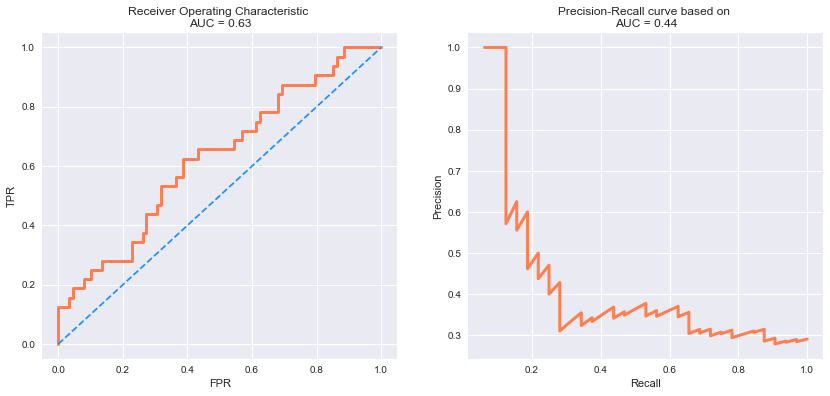

In [5]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()